In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import math

# Mini Projeto 12 - Amostragem de Gibbs para o modelo de Ising

In [33]:
def evolve_to_equilibrium(M1, L, current_t, T_equilib):
    for t in range(T_equilib):
        M2 = M1.copy()
        
        for k in range(L):
            for l in range(L):
                x = rnd.randint(0, L-1)
                y = rnd.randint(0, L-1)
                
                choose = M1[x,y]
                neighs = [M1[(x+1)%L,y], 
                          M1[(x-1)%L,y], 
                          M1[x,(y+1)%L], 
                          M1[x,(y-1)%L]]
                
                energ = 2 * choose * np.sum(neighs)
                
                if energ < 0:
                    choose *= -1
                
                elif rnd.random() < np.exp(-energ/current_t):
                    choose *= -1
                        
                M2[x,y] = choose
                
        M1 = M2
    return M1

In [47]:
def evolve_after_equilibrium(M1, L, current_t, T_max):
    energy = 0
    magnet = 0
    
    for t in range(T_max):
        M2 = M1.copy()
        
        for i in range(L):
            for j in range(L):    
                x = rnd.randint(0, L-1)
                y = rnd.randint(0, L-1)
                
                choose = M1[x,y]
                neighs = [M1[(x+1)%L,y], 
                          M1[(x-1)%L,y], 
                          M1[x,(y+1)%L], 
                          M1[x,(y-1)%L]]
                
                energ = 2 * choose * np.sum(neighs)
                
                if energ < 0:
                    choose *= -1
                
                elif rnd.random() < np.exp(-energ/current_t):
                    choose *= -1
                        
                M2[x,y] = choose
                energy -= choose * np.sum(neighs) / 4
                
        M1 = M2
        magnet += np.sum(M1)
    
    return M1, energy / T_max , energy / (T_max * (L**2)), magnet / (T_max * (L**2))

In [48]:
def get_ising_model(L, T_equilib, N_samples, N_temps):
    temps_all = []
    energy_all = []
    magnet_all = []
    heat_all = []
    
    for temp in np.linspace(1, 4, N_temps):
        M1 = np.ones((L,L))
        
        M1 = evolve_to_equilibrium(M1=M1, L=L, current_t=temp, T_equilib=T_equilib)
        
        M1, e_i, energy, magnet = evolve_after_equilibrium(M1=M1, L=L, current_t=temp, T_max=N_samples)
        
        temps_all.append(temp)
        energy_all.append(energy)
        magnet_all.append(magnet)
        
        heat_all.append((e_i**2 - e_i) / (L**2))
        
    return temps_all, energy_all, magnet_all, heat_all

## Resultados

In [65]:
tem10 = get_ising_model(L=10, T_equilib=100, N_samples=100, N_temps=50)
tem20 = get_ising_model(L=20, T_equilib=100, N_samples=100, N_temps=50)
tem30 = get_ising_model(L=30, T_equilib=100, N_samples=100, N_temps=50)
tem40 = get_ising_model(L=40, T_equilib=100, N_samples=100, N_temps=50)

### Magnetização

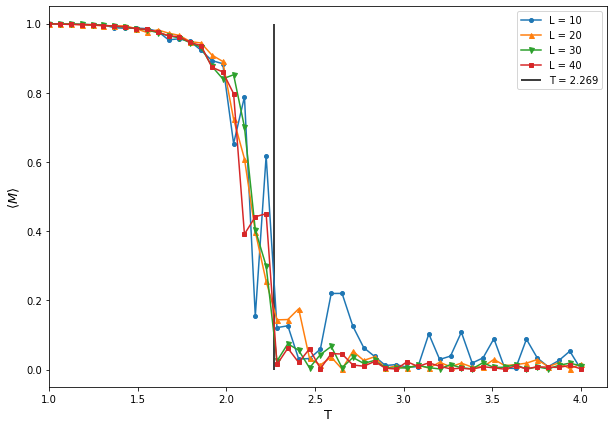

In [66]:
plt.figure(figsize=(10,7))
plt.plot(tem10[0], np.abs(tem10[2]), 'o-', ms=4, label='L = 10')
plt.plot(tem20[0], np.abs(tem20[2]), '^-', ms=5, label='L = 20')
plt.plot(tem30[0], np.abs(tem30[2]), 'v-', ms=5, label='L = 30')
plt.plot(tem40[0], np.abs(tem40[2]), 's-', ms=4, label='L = 40')
plt.vlines(2.269, 0, 1, color='k', label='T = 2.269')
plt.legend()
plt.xlabel('T', fontsize=13)
plt.ylabel(r'$\langle{M}\rangle$', fontsize=13)
plt.xlim(1,)
plt.show()

### Energia

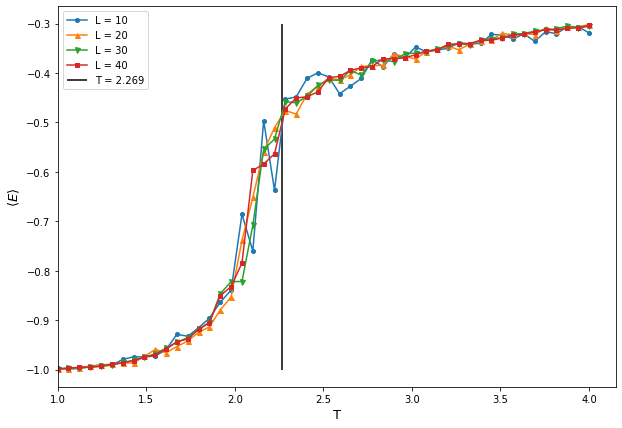

In [73]:
plt.figure(figsize=(10,7))
plt.plot(tem10[0], tem10[1], 'o-', ms=4, label='L = 10')
plt.plot(tem20[0], tem20[1], '^-', ms=5, label='L = 20')
plt.plot(tem30[0], tem30[1], 'v-', ms=5, label='L = 30')
plt.plot(tem40[0], tem40[1], 's-', ms=4, label='L = 40')
plt.vlines(2.269, -1, -0.3, color='k', label='T = 2.269')
plt.legend()
plt.xlabel('T', fontsize=13)
plt.ylabel(r'$\langle{E}\rangle$', fontsize=13)
plt.xlim(1,)
plt.show()

### Calor específico

In [68]:
def get_c_espec(e):
    exp_res = np.mean(e)
    var_res = [np.sqrt((e[i]**2 - exp_res**2)**2) for i in range(len(e))]
    return var_res

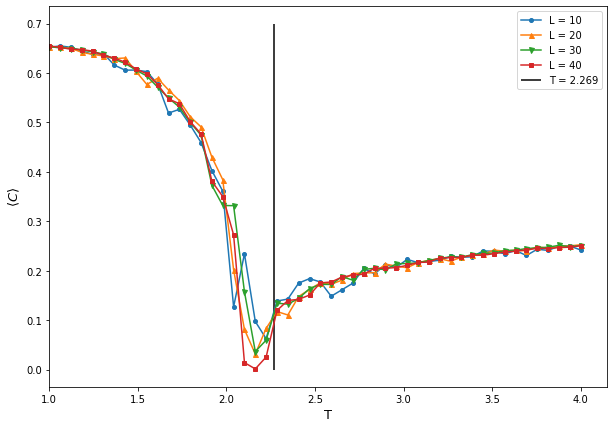

In [74]:
plt.figure(figsize=(10,7))
plt.plot(tem10[0], get_c_espec(tem10[1]), 'o-', ms=4, label='L = 10')
plt.plot(tem20[0], get_c_espec(tem20[1]), '^-', ms=5, label='L = 20')
plt.plot(tem30[0], get_c_espec(tem30[1]), 'v-', ms=5, label='L = 30')
plt.plot(tem40[0], get_c_espec(tem40[1]), 's-', ms=4, label='L = 40')
plt.vlines(2.269, 0, 0.7, color='k', label='T = 2.269')
plt.legend()
plt.xlabel('T', fontsize=13)
plt.ylabel(r'$\langle{C}\rangle$', fontsize=13)
plt.xlim(1,)
plt.show()